## IMDB data analysis
### Random Forest Classifier

We define the **hyperparameters** that will be used to reconstruct the given data.

In [44]:
m = 500   # Πλήθος λέξεων του λεξιλογίου
n = 50    # Πιο συχνές λέξεις για παράληψη
k = 0      # Λιγότερο συχνές λέξεις για παράληψη

We draw the data from the IMDB database, ignoring the n most frequently used words  and the k least frequently used words . (hyperparameters)


In [45]:
import tensorflow as tf
import numpy as np
from math import log 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=m-k, skip_top=n)
word_index = tf.keras.datasets.imdb.get_word_index()

index2word = dict((i + 3, word) for (word, i) in word_index.items())
index2word[0] = '[pad]'
index2word[1] = '[bos]'
index2word[2] = '[oov]'

x_train = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train])
x_test = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test])

### Creation of binary vectors

We convert the extracted data into binary vectors. Possible values ​​are 0 and 1. A value of 1 implies that the corresponding word is contained in the text, while a value of 0 implies that it is not contained.

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

binary_vectorizer = CountVectorizer(binary=True)
x_train_binary = binary_vectorizer.fit_transform(x_train)
x_test_binary = binary_vectorizer.transform(x_test)

x_train_binary = np.array(x_train_binary.toarray())
x_test_binary = np.array(x_test_binary.toarray())
print(
    'Vocabulary size:', len(binary_vectorizer.vocabulary_)
)

Vocabulary size: 441


X is an array of vectors (reviews), with each vector representing words. Y is a vector of labels (0 or 1) where 0 is a negative review and 1 a positive one.

$$X = \begin{bmatrix} \vec{x_{1}} \\ \vdots \\ \vec{x_{m}} \end{bmatrix}\, \, \, 
y = \begin{bmatrix} y_{1} \\ \vdots \\ y_{m} \end{bmatrix}$$


### Implementation of the Random Forest Classifier

Class that implements the Random Forest Classifier. The class consists of two basic methods, fit and predict. The fit method trains the algorithm using the array of binary vectors X and the array of labels y. The predict method takes as input an array of vectors and returns a predicted vector with labels.


In [48]:
from statistics import mode
import numpy as np
from id3 import ID3

class RandomForest:
    def __init__(self, m=200, num_of_trees=3, max_depth=10):
        self.m = m
        self.num_of_trees = num_of_trees
        self.max_depth = max_depth
        self.random_trees = []

    def fit(self, X, y):
        self.random_trees.clear()
        print("Starting fitting process")

        for i in range(self.num_of_trees):
            print(f"Fitting tree {i + 1}/{self.num_of_trees}")
            random_x, random_y = self.select_random_samples(X, y)

            if len(random_x) > 0:
                print(f"Random samples: {random_x.shape}")
                random_features = self.select_random_features(random_x)
                id3 = ID3(features=random_features)
                tree = id3.fit(random_x, random_y)
                
                if tree is not None:  # Check if a valid tree is returned
                    print(f"Tree {i + 1} fitted successfully")
                    self.random_trees.append(id3)
                else:
                    print(f"Skipping tree {i + 1} due to empty data or other issues.")
            else:
                print(f"Skipping tree {i + 1} due to empty data.")

        print("Fitting process completed")

    def select_random_samples(self, X, y):
        x_sample = list()
        y_sample = list()
        indices = np.arange(len(y))

        for i in range(len(y)):
            random_choice = np.random.choice(indices)
            x_sample.append(X[random_choice])
            y_sample.append(y[random_choice])

        x_sample = np.array(x_sample)
        y_sample = np.array(y_sample)   

        return x_sample, y_sample

    def select_random_features(self, random_x):
        indices = np.arange(len(random_x[0]))
        random_feature_indices = np.random.choice(indices, self.m, replace=False)

        return random_feature_indices
    
    def predict(self, X):
        predictions = []
        total = list()
        
        for tree in self.random_trees:
            categories = tree.predict(X)
            total.append(np.array(categories))

        for i in range(0, X.shape[0]): 
            num1 = 0
            num0 = 0
            for category in total:
                if(category[i] == 1):
                    num1 +=1
                else:
                    num0 +=1
            if num1 > num0:
                predictions.append(1)
            else:
                predictions.append(0)

        return np.array(predictions)

In [49]:
from visualizations import *

## Results of the Random Forest Classifier

The Random Forest Classifier is evaluated on the existing datasets and produces training and evaluation responses for each subset of the dataset.

In [50]:
data = classification_data(RandomForest(m=200, num_of_trees = 3, max_depth=10), x_train_binary, y_train, x_test_binary, y_test, 5)

print(classification_report(y_test, data['test_predictions']))
data_table = classification_table(data, x_train_binary)
ipd.display(data_table)

Starting fitting process
Fitting tree 1/3
Random samples: (5000, 441)
Tree 1 fitted successfully
Fitting tree 2/3
Random samples: (5000, 441)
Tree 2 fitted successfully
Fitting tree 3/3
Random samples: (5000, 441)
Tree 3 fitted successfully
Fitting process completed
Starting fitting process
Fitting tree 1/3
Random samples: (10000, 441)
Tree 1 fitted successfully
Fitting tree 2/3
Random samples: (10000, 441)
Tree 2 fitted successfully
Fitting tree 3/3
Random samples: (10000, 441)
Tree 3 fitted successfully
Fitting process completed
Starting fitting process
Fitting tree 1/3
Random samples: (15000, 441)
Tree 1 fitted successfully
Fitting tree 2/3
Random samples: (15000, 441)
Tree 2 fitted successfully
Fitting tree 3/3
Random samples: (15000, 441)
Tree 3 fitted successfully
Fitting process completed
Starting fitting process
Fitting tree 1/3
Random samples: (20000, 441)
Tree 1 fitted successfully
Fitting tree 2/3
Random samples: (20000, 441)
Tree 2 fitted successfully
Fitting tree 3/3
Rando

,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test
5000,0.90,0.60,0.89,0.60,0.92,0.63,0.91,0.61
10000,0.91,0.62,0.90,0.62,0.92,0.64,0.91,0.63
15000,0.91,0.62,0.90,0.62,0.92,0.64,0.91,0.63
20000,0.90,0.62,0.90,0.61,0.91,0.63,0.90,0.62
25000,0.90,0.63,0.90,0.62,0.91,0.64,0.91,0.63


### Learning Curve of Random Forest

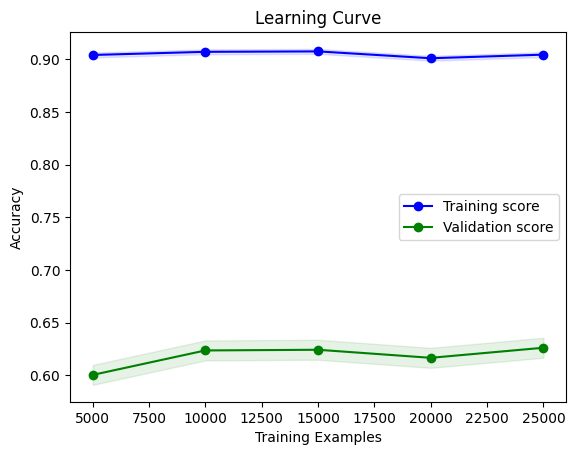

In [52]:
plot_learning_curve(data)

### Precision, accuracy, recall and F1 curves

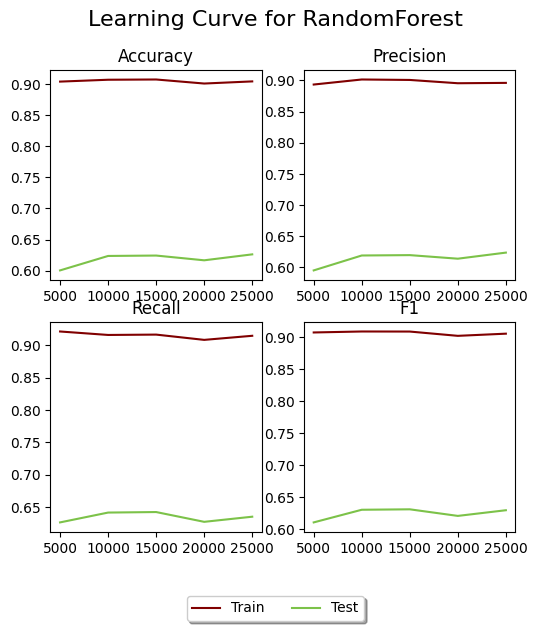

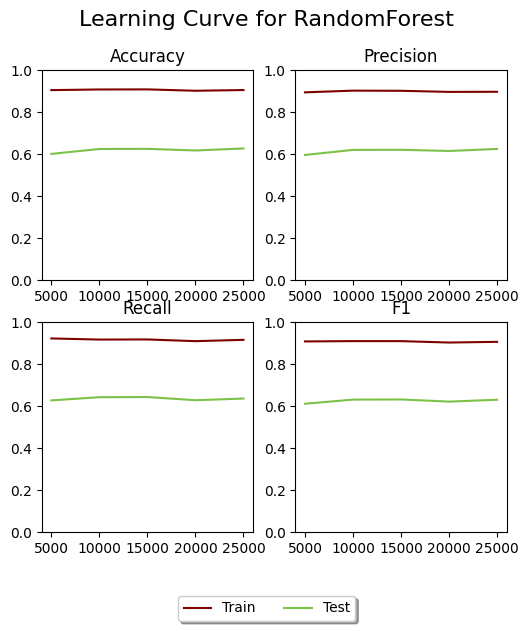

In [53]:
classification_plots(data)
r = classification_plots(data, True)

## Comparison of Random Forest and SKLearn's Random Forest

Random Forest is evaluated against the SKLearn library's Random Forest Classifier. The results are identical to each other. Below is the difference table of the results of the 2 algorithms.

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', max_features=200, n_estimators=3, max_depth=10)
rf_data = classification_data(rf, x_train_binary, y_train, x_test_binary, y_test, 5)
rf_data['estimator'] = "SKLearn's Random Forest"
rf_table = classification_table(rf_data, x_train_binary)
difference_table = abs(rf_table - data_table)
difference_table = difference_table.style.set_caption('Πίνακας Διαφοράς για τον {estimator} και τον {estimator_2}'.format(estimator=data['estimator'], estimator_2=rf_data['estimator']))
ipd.display(difference_table)

,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test
5000,0.100000,0.110000,0.130000,0.080000,0.030000,0.180000,0.090000,0.130000
10000,0.140000,0.100000,0.180000,0.060000,0.020000,0.200000,0.110000,0.120000
15000,0.140000,0.120000,0.170000,0.080000,0.060000,0.190000,0.120000,0.130000
20000,0.130000,0.120000,0.180000,0.090000,0.030000,0.210000,0.110000,0.140000
25000,0.140000,0.100000,0.180000,0.080000,0.070000,0.170000,0.130000,0.120000


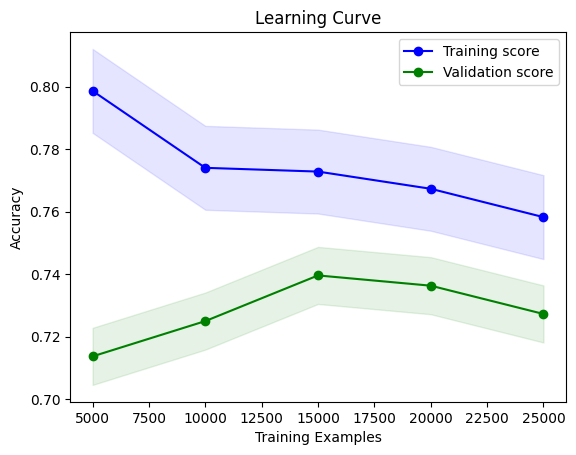

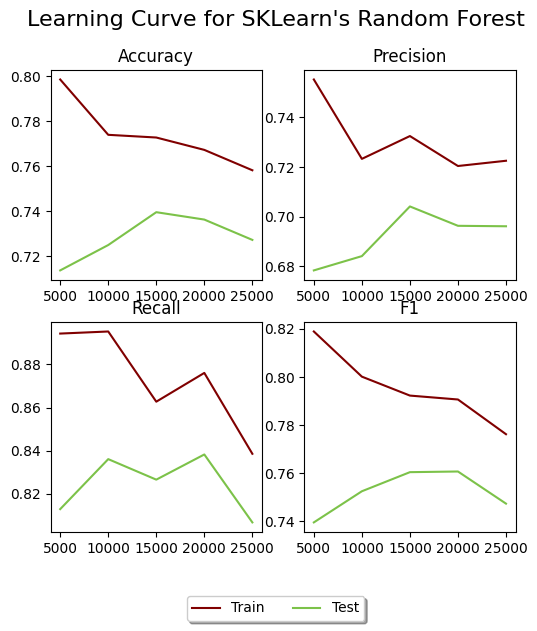

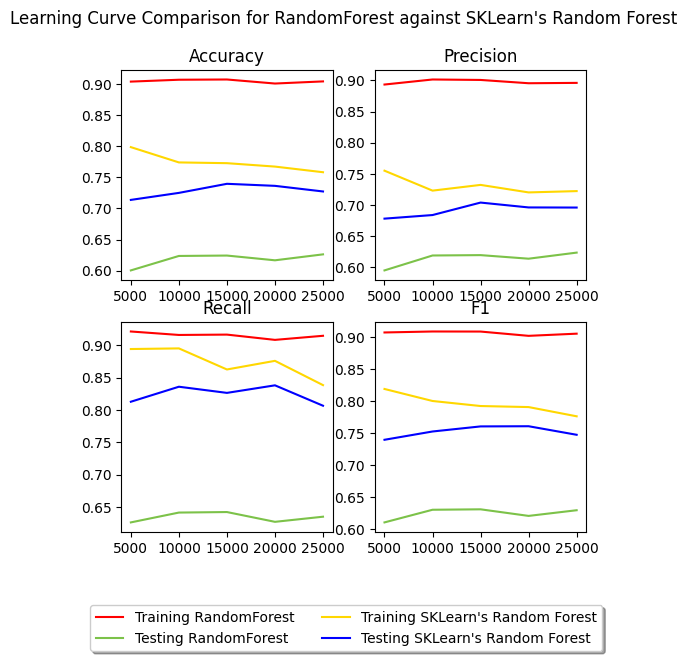

In [55]:
plot_learning_curve(rf_data)
classification_plots(rf_data)
r = classification_plots_compare(data, rf_data, False)

### Comparison of Random Forest and SKLearn's Ada Boost

Random Forest is evaluated against the SKLearn library's Ada Boost. The results are identical to each other. Below is the difference table of the results of the 2 algorithms.

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     12500
           1       0.78      0.82      0.80     12500

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test
5000,0.070000,0.200000,0.070000,0.190000,0.070000,0.190000,0.080000,0.190000
10000,0.090000,0.190000,0.090000,0.180000,0.080000,0.180000,0.080000,0.180000
15000,0.100000,0.190000,0.100000,0.180000,0.080000,0.180000,0.090000,0.180000
20000,0.080000,0.190000,0.090000,0.200000,0.080000,0.190000,0.080000,0.190000
25000,0.090000,0.180000,0.100000,0.190000,0.080000,0.190000,0.090000,0.190000


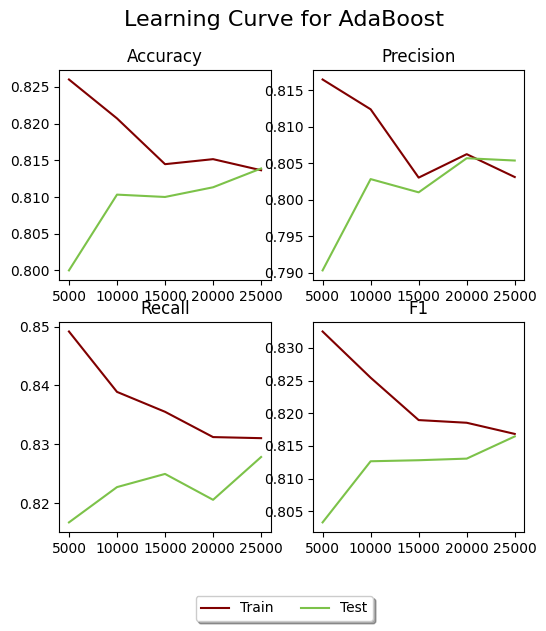

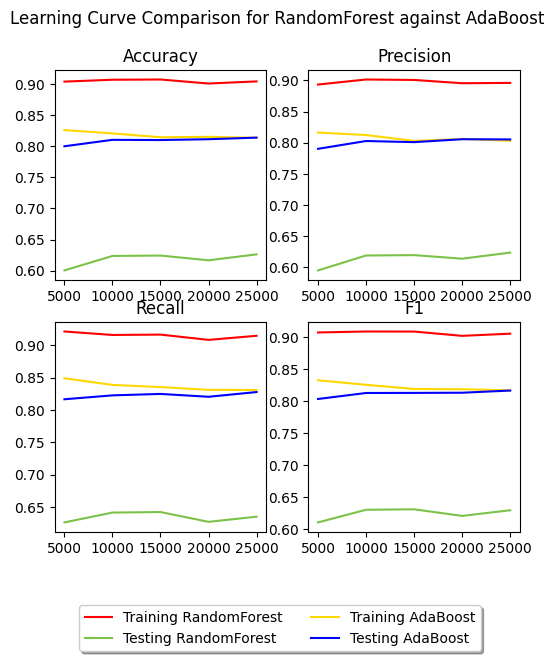

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier()
ada.fit(x_train_binary, y_train)
print(classification_report(y_test, ada.predict(x_test_binary), zero_division=1))

ada_data = classification_data(AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100), x_train_binary, y_train, x_test_binary, y_test, 5)
ada_data['estimator'] = 'AdaBoost'
ada_table = classification_table(ada_data, x_train_binary)
difference_table_ada = abs(ada_table - data_table)
difference_table_ada = difference_table_ada.style.set_caption('Πίνακας Διαφοράς για τον {estimator} και τον {estimator_2}'.format(estimator=data['estimator'], estimator_2=ada_data['estimator']))
ipd.display(difference_table_ada)

classification_plots(ada_data)
r = classification_plots_compare(data, ada_data)

### Selection of Hyperparameters
We use the following code to decide which hyperparameters are best. In 3 arrays M, K, N, we have various values ​​with

M: number of vocabulary words

N: number of most frequent words to skip

K: number of rarest words to skip

We use the accuracy of the classifier on the growth data to decide which combination of m, n, k is the best.

In [ ]:
from sklearn.model_selection import train_test_split

N = [50, 100, 200, 300]
K = [0, 20, 50, 80]
M = [200, 300, 500, 2000, 2500]

binary_vectorizer = CountVectorizer(binary=True)
minK = 0
minN = 0
minM = 0
maxAccuracy = -float('inf')

for m in M:
    for n in N:
        for k in K:
            (x_trainn, y_trainn), (x_testt, y_testt) = tf.keras.datasets.imdb.load_data(num_words=m-k, skip_top=n)
            x_trainn, x_dev, y_trainn, y_dev = train_test_split(x_trainn, y_trainn, test_size=0.2)
            word_index = tf.keras.datasets.imdb.get_word_index()

            index2word = dict((i + 3, word) for (word, i) in word_index.items())
            index2word[0] = '[pad]'
            index2word[1] = '[bos]'
            index2word[2] = '[oov]'

            x_trainn = np.array([' '.join([index2word[idx] for idx in text]) for text in x_trainn])
            x_dev = np.array([' '.join([index2word[idx] for idx in text]) for text in x_dev])

            x_trainn_binary = binary_vectorizer.fit_transform(x_trainn)
            x_val_binary = binary_vectorizer.transform(x_dev)

            x_trainn_binary = np.array(x_trainn_binary.toarray())
            x_val_binary = np.array(x_val_binary.toarray())
            
            rfc = RandomForest()
            rfc. fit(x_trainn_binary, y_trainn)
            predicted_values = rfc.predict(x_val_binary)
            print("For M={}, N={} and K={}:".format(m, n, k))
            acc = accuracy_score(y_dev, predicted_values)
            print('Accuracy:', acc)
            if acc > maxAccuracy:
                maxAccuracy = acc
                minN = n
                minK = k
                minM = m

print("\nBest model parameters are:\n\tN: {}\n\tK:{} \n\tM: {}".format(minN, minK, minM))

We use the following code to find the optimal number of trees for the Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

n = 50
k = 0
m = 500

binary_vectorizer = CountVectorizer(binary=True)
maxAccuracy = -float('inf')

(x_trainn, y_trainn), (x_testt, y_testt) = tf.keras.datasets.imdb.load_data(num_words=m-k, skip_top=n)
x_trainn, x_dev, y_trainn, y_dev = train_test_split(x_trainn, y_trainn, test_size=0.2)
word_index = tf.keras.datasets.imdb.get_word_index()

index2word = dict((i + 3, word) for (word, i) in word_index.items())
index2word[0] = '[pad]'
index2word[1] = '[bos]'
index2word[2] = '[oov]'

x_trainn = np.array([' '.join([index2word[idx] for idx in text]) for text in x_trainn])
x_dev = np.array([' '.join([index2word[idx] for idx in text]) for text in x_dev])

x_trainn_binary = binary_vectorizer.fit_transform(x_trainn)
x_val_binary = binary_vectorizer.transform(x_dev)

x_trainn_binary = np.array(x_trainn_binary.toarray())
x_val_binary = np.array(x_val_binary.toarray())

num_of_trees = [x for x in range(3,5,7)]

best_acc = 0.0
best_num = 1
for num_tree in num_of_trees:
    rf = RandomForest(m=200, num_trees=num_tree)
    rf.fit(x_trainn_binary, y_trainn)
    acc = accuracy_score(y_dev, rf.predict(x_val_binary))
    if acc > best_acc:
        best_acc = acc
        best_num = num_tree

print("The best number of trees is: ", best_num)